In [10]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from glob import glob
from tqdm import tqdm
from obspy.geodetics.base import gps2dist_azimuth
import matplotlib.ticker as ticker
import os

In [11]:
client = Client('IRIS')

In [12]:
def get_info(inventory):
    lats = []
    lons = []
    net = []
    sta = []
    loc = []
    chan = []
    for i in range(len(inventory)):
        for k in range(len(inventory[i])):
            for j in range(len(inventory[i][k])):
                net.append(inventory[i].code)
                sta.append(inventory[i][k].code)
                loc.append(inventory[i][k][j].location_code)
                chan.append(inventory[i][k][j].code)
                lats.append(inventory[i][k][j].latitude)
                lons.append(inventory[i][k][j].longitude)

    net = np.array(net)
    sta = np.array(sta)
    loc = np.array(loc)
    chan = np.array(chan)
    lats = np.array(lats)
    lons = np.array(lons)

    df = pd.DataFrame({'Network':net, 'Station':sta, 'Location':loc,'Channel':chan, 'latitude':lats, 'longitude':lons},index=net)
    if len(df[df['Network']=='SY'].values) != 0:
        df.drop(['SY'],inplace=True)
    return df

# Typical Event

In [13]:
origin_time_te = obspy.UTCDateTime(2021,8,25,18,1,34)
latitude_te= 44.781
longitude_te= -110.789
minradius=0
maxradius=1
depth_te = 14.2 
starttime_te = origin_time_te - 1*60
endtime_te = origin_time_te + 300
inv_te = client.get_stations(starttime_te, endtime_te, latitude=latitude_te, 
                    longitude=longitude_te, minradius=minradius, channel='EH*,HH*,BH*',level='response', 
                    maxradius=maxradius,matchtimeseries=True)

In [5]:
inv_te

Inventory created at 2022-01-25T10:20:50.836000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2021-08-25...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (7):
			IW, MB, PB, RC, RE, US, WY
		Stations (48):
			IW.FLWY (Flagg Ranch, Wyoming, USA)
			IW.IMW (Indian Meadow, Wyoming, USA)
			MB.BGMT (Barton Gulch, Montana)
			MB.BZMT (Bozeman Pass, Montana)
			MB.CRMT (Chrome Mountain, Montana)
			MB.MSMT (Mission Creek, Montana)
			MB.QLMT (Earthquake Lake, Montana)
			MB.STMT (Stillwater Mine, Montana)
			MB.TPMT (Tepee Creek, Montana)
			PB.B206 (canyon206bwy2008, Yellowstone, WY, USA)
			PB.B207 (madisn207bwy2007, Yellowstone, Wy, USA)
			PB.B208 (lakejn208bwy2007, Yellowstone, Wy, USA)
			PB.B944 (grantt944bwy2008, Yellowstone, WY, USA)
			PB.B945 (panthr945swy2008, Yellowstone, WY, USA)
			PB.B950 (norris950bwy2013, Yellowstone, WY, USA)
			RC.CMI (Centennial Mountains, Idaho)
			RE.JKL

In [16]:
stream_dlf = obspy.read('/home/aakash/Desktop/Reference_Papers/Keith_Koper/Tasks//stream_te.mseed')

In [14]:
from obspy.signal.trigger import recursive_sta_lta

In [56]:
trace = stream_dlf[60]

In [57]:
trace.stats

         network: WY
         station: YHH
        location: 01
         channel: HHZ
       starttime: 2021-08-25T18:00:34.008391Z
         endtime: 2021-08-25T18:06:33.998391Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 36000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 77, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 4588544})

In [58]:
samprate = 100

In [83]:
cf = recursive_sta_lta(trace.data, int(2*samprate),int(50*samprate))

In [84]:
from obspy.signal.trigger import plot_trigger

In [85]:
from obspy.signal.trigger import trigger_onset 

<IPython.core.display.Javascript object>


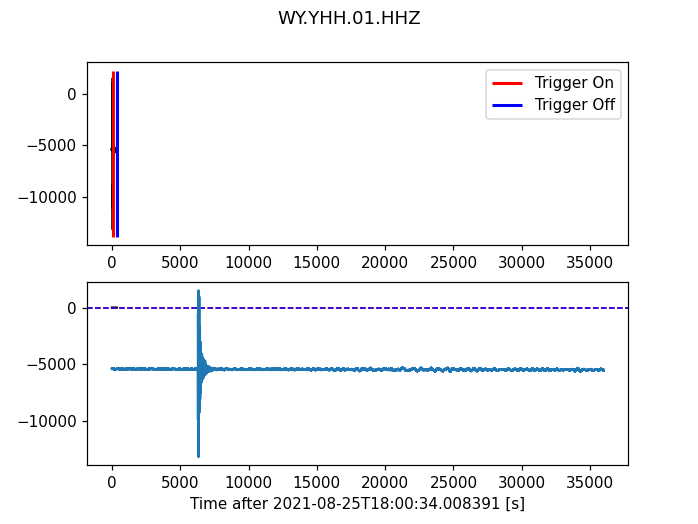

In [86]:
plot_trigger(trace, cf, 1.2, 0.5) 

In [74]:
from obspy.signal.trigger import trigger_onset 

In [64]:
trig = trigger_onset(cf, 1.2, 0.5) / samprate

In [65]:
trig

array([[  50.  ,  359.99]])

<IPython.core.display.Javascript object>


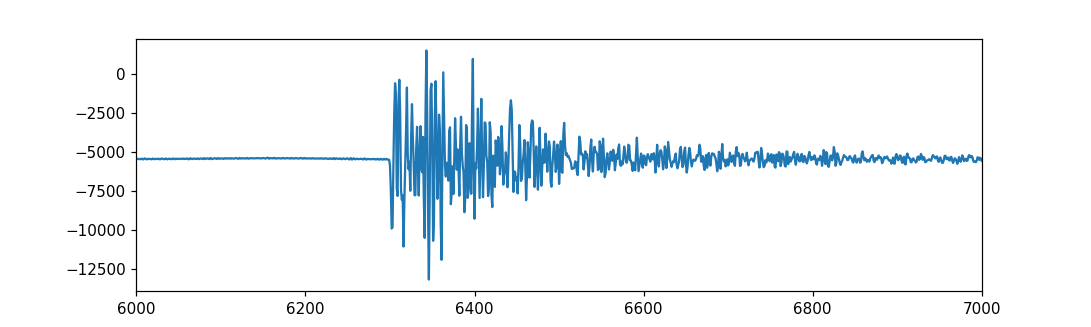

(6000.0, 7000.0)

In [91]:
plt.figure(figsize=[10,3])
plt.plot(trace.data)
plt.xlim(6000,7000)

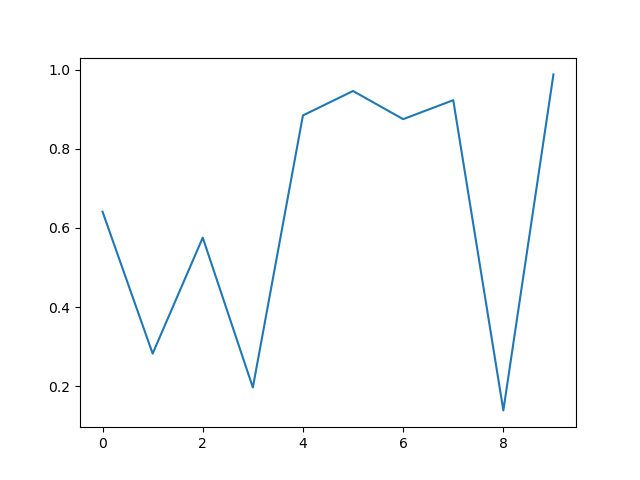

In [4]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [10]:
fig.canvas.mpl_disconnect(cid)

<IPython.core.display.Javascript object>


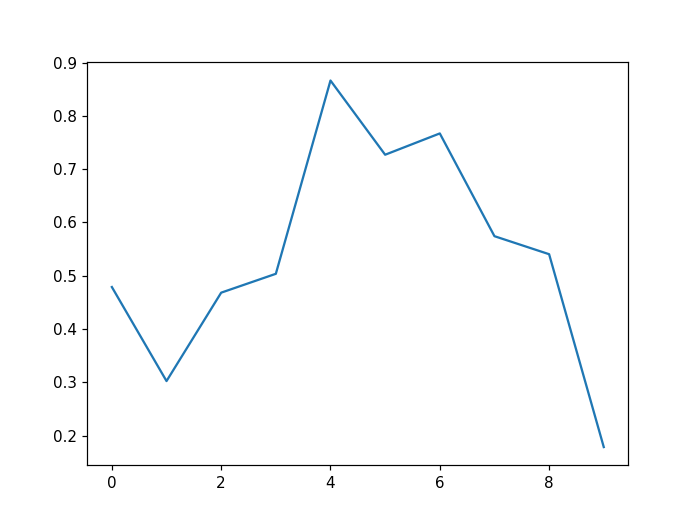

In [9]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))
text=ax.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press"_event', onclick)


In [6]:
tx

NameError: name 'tx' is not defined

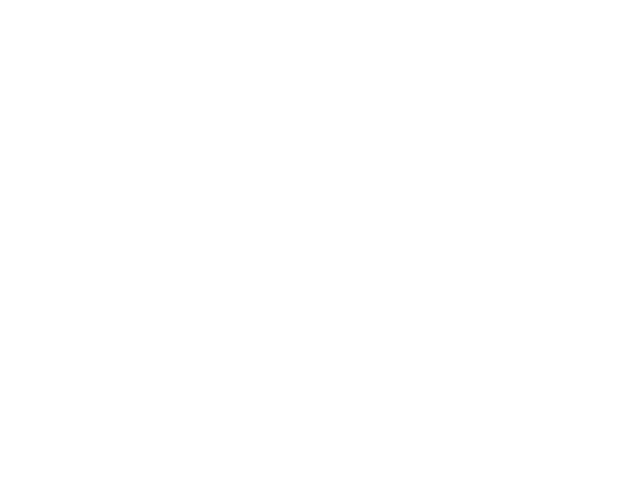